<a href="https://colab.research.google.com/github/yweslakarep123/UCL_STUF/blob/main/UCL_stuff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [4]:
!chmod 600 /content/kaggle.json

In [5]:
!kaggle datasets download -d fardifaalam170041060/champions-league-dataset-1955-2023

Dataset URL: https://www.kaggle.com/datasets/fardifaalam170041060/champions-league-dataset-1955-2023
License(s): MIT
  0% 0.00/9.57k [00:00<?, ?B/s]
100% 9.57k/9.57k [00:00<00:00, 18.9MB/s]


In [6]:
!pip install patool pyunpack

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.0/96.0 kB 947.0 kB/s eta 0:00:00


In [7]:
from pyunpack import Archive
zip_file_path = '/content/champions-league-dataset-1955-2023.zip'
extract_directory = '/content/drive/MyDrive/Test_dataset'
# Buka dan ekstrak file ZIP menggunakan patool
Archive(zip_file_path).extractall(extract_directory)

# Output pesan jika ekstraksi selesai
print("Ekstraksi selesai.")

Ekstraksi selesai.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('/content/drive/MyDrive/Test_dataset/UCL_AllTime_Performance_Table - UCL_Alltime_Performance_Table.csv')

In [11]:
df.head()

,#,Team,M.,W,D,L,goals,Dif,Pt.
0,1.0,Real Madrid,486,291,85,110,1076:55:00,533,533
1,2.0,Bayern München,388,231,78,79,817:24:00,427,427
2,3.0,FC Barcelona,341,196,77,68,675:51:00,319,319
3,4.0,Manchester United,289,153,69,67,524:56:00,224,224
4,5.0,Juventus,297,151,68,78,472:57:00,171,171


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   #       333 non-null    float64
 1   Team    354 non-null    object 
 2   M.      354 non-null    int64  
 3   W       354 non-null    int64  
 4   D       354 non-null    int64  
 5   L       354 non-null    int64  
 6   goals   354 non-null    object 
 7   Dif     354 non-null    int64  
 8   Pt.     354 non-null    int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 25.0+ KB


In [14]:
df.isnull().sum()

#        21
Team      0
M.        0
W         0
D         0
L         0
goals     0
Dif       0
Pt.       0
dtype: int64

In [15]:
df = df.drop(['#','goals'],axis=1)
df.head()

,Team,M.,W,D,L,Dif,Pt.
0,Real Madrid,486,291,85,110,533,533
1,Bayern München,388,231,78,79,427,427
2,FC Barcelona,341,196,77,68,319,319
3,Manchester United,289,153,69,67,224,224
4,Juventus,297,151,68,78,171,171


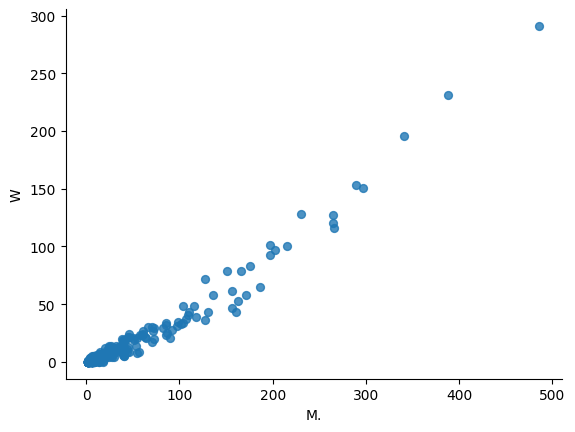

In [18]:
# @title M. vs W
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='M.', y='W', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

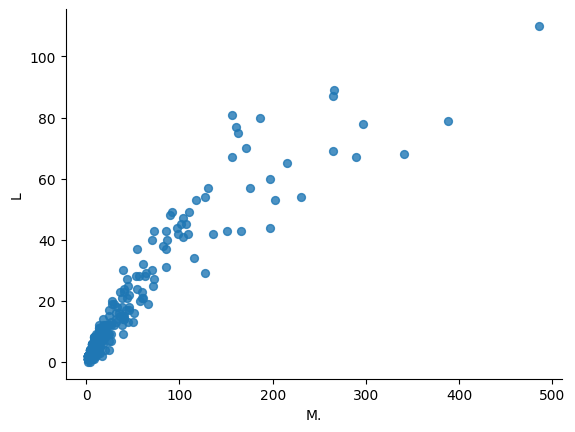

In [19]:
# @title M. vs L
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='M.', y='L', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

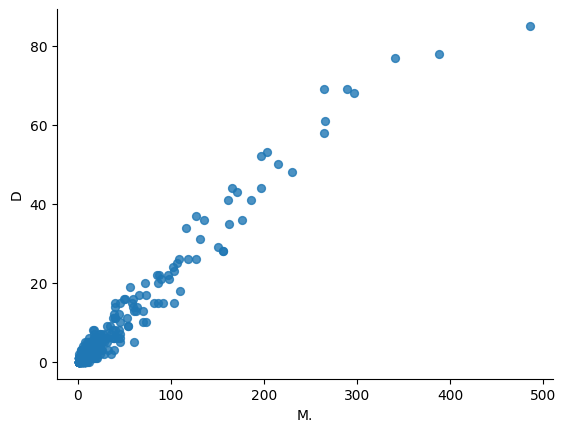

In [21]:
# @title M. vs D
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='M.', y='D', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [23]:
Minimum_M_category=df.loc[df['M.'].idxmin()]
Minimum_M_category

Team    AE Lárissa
M.               2
W                1
D                0
L                1
Dif              0
Pt.              0
Name: 244, dtype: object

In [28]:
maximum_M_category=df.loc[df['M.'].idxmax()]
maximum_M_category

Team    Real Madrid
M.              486
W               291
D                85
L               110
Dif             533
Pt.             533
Name: 0, dtype: object

In [24]:
Minimum_W_category=df.loc[df['W'].idxmin()]
Minimum_W_category

Team    KRC Genk
M.            18
W              0
D              8
L             10
Dif          -36
Pt.          -36
Name: 190, dtype: object

In [29]:
maximum_W_category=df.loc[df['W'].idxmax()]
maximum_W_category

Team    Real Madrid
M.              486
W               291
D                85
L               110
Dif             533
Pt.             533
Name: 0, dtype: object

In [26]:
Minimum_L_category=df.loc[df['L'].idxmin()]
Minimum_L_category

Team    Zbrojovka Brno
M.                   4
W                    1
D                    3
L                    0
Dif                  2
Pt.                  2
Name: 206, dtype: object

In [30]:
maximum_L_category=df.loc[df['L'].idxmax()]
maximum_L_category

Team    Real Madrid
M.              486
W               291
D                85
L               110
Dif             533
Pt.             533
Name: 0, dtype: object

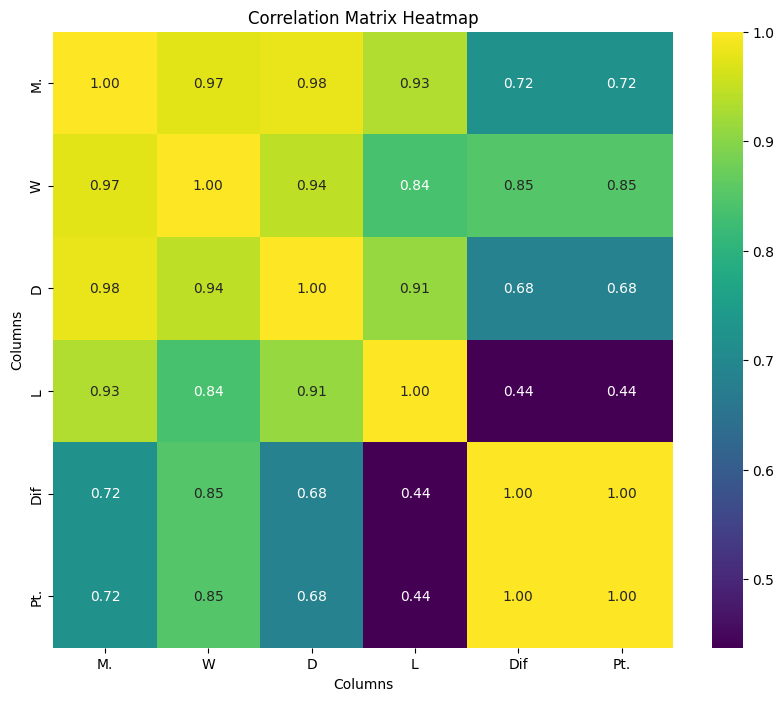

In [37]:
numerical_df = df.select_dtypes(include=[np.number])

# Langkah 3: Menghitung korelasi antar kolom numerik
correlation_matrix = numerical_df.corr()

# Langkah 4: Membuat heatmap untuk matrix korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='viridis', annot=True, fmt='.2f')

# Menambahkan judul dan label
plt.title('Correlation Matrix Heatmap')
plt.xlabel('Columns')
plt.ylabel('Columns')

# Menampilkan plot
plt.show()

In [38]:
df1 = pd.read_csv('/content/drive/MyDrive/Test_dataset/UCL_Finals_1955-2023 - UCL_Finals_1955-2023.csv')

In [39]:
df1.head()

,Season,Country,Winners,Score,Runners-up,Country.1,Venue,Attend­ance,Notes
0,1955–56,Spain,Real Madrid,4–3,Reims,France,"Parc des Princes, Paris, France","38,239",NaN
1,1956–57,Spain,Real Madrid,2–0,Fiorentina,Italy,"Santiago Bernabéu, Madrid, Spain","124,000",NaN
2,1957–58,Spain,Real Madrid,3–2,Milan,Italy,"Heysel Stadium, Brussels, Belgium","67,000",Match was won during extra time
3,1958–59,Spain,Real Madrid,2–0,Reims,France,"Neckarstadion, Stuttgart, West Germany","72,000",NaN
4,1959–60,Spain,Real Madrid,7–3,Eintracht Frankfurt,West Germany,"Hampden Park, Glasgow, Scotland","127,621",NaN


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Team    354 non-null    object
 1   M.      354 non-null    int64 
 2   W       354 non-null    int64 
 3   D       354 non-null    int64 
 4   L       354 non-null    int64 
 5   Dif     354 non-null    int64 
 6   Pt.     354 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 19.5+ KB
